In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas as pd
import numpy as np
import sklearn
import scipy
import sklearn.cluster
import data
import plot
import matplotlib.pyplot as plt
import seaborn as sns
from plot import plot_bars, plot_heatmap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df, df_types, groups = data.get_data()
all_col, bool_col, free_col, mc_col, star_col, num_3 = data.get_subsets(df, df_types)
iq1, iq2 = data.get_interesting(df)
min_value = tuple(map(str, np.arange(0, 31, 5)))

In [7]:
liq = groups['location_independent']['questions']
lii = groups['location_independent']['indicator']
aq = groups['all']['questions']
liqmc = liq & mc_col
sliq = liq[8:10] | liq[17:25]
mod_col = 'How many countries have you visited in the past 12 months?'
df.loc[df[mod_col] == '2-3 countrys',mod_col] = '2-3 countries'
df.loc[df[mod_col] == '3-5 countrys',mod_col] = '3-5 countries'

In [12]:
accommodation = liq[18:25]
mobility = sliq2

In [13]:
df_ = df[lii].copy()
df_acc = data.cluster_pre(df_, liqmc, accommodation)
df_mobil = data.cluster_pre(df_, liqmc, mobility)

In [14]:
# plot.plot_n_cluster(dfps2)

In [15]:
km = sklearn.cluster.KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=323423, copy_x=True, n_jobs=1)
df_['cluster_acc'] = km.fit_predict(df_acc)

In [16]:
agg = sklearn.cluster.AgglomerativeClustering(n_clusters=2)
df_['cluster_mobil'] = agg.fit_predict(df_mobil)

In [49]:
# cluster_names = \
# {
#     0: 'Relax Modern',
#     1: 'Adventurous',
#     2: 'Relax Traditional',
#     3: 'Slow mover'
# }
# df_['cluster_agg3_str'] = df_['cluster_agg3'].apply(lambda x: cluster_names[x])
cluster_names = \
{
    0: 'Comfortable',
    1: 'Adventurous'
}
df_['cluster_acc_str'] = df_['cluster_acc'].apply(lambda x: cluster_names[x])
cluster_names = \
{
    0: 'less mobile',
    1: 'high mobile'
}
df_['cluster_mobil_str'] = df_['cluster_mobil'].apply(lambda x: cluster_names[x])
df_['cluster_acc_mobil'] = df_['cluster_acc_str'] + ' ' + df_['cluster_mobil_str']

# Cluster of Location Independent Respondents
In the following we cluster the location independent respondents according to their answers regarding accomodation and housing indepentenly.
In general a clustering tries to cluster the respondents into groups such that the respondents in each group are most similar in respect of their respective answers. A parameter for most clustering algorithm is the number of clusters. I choose two in both cases (accomodation and mobility), because with a higher number of clusters the number of individuals within each cluster are too small for a meaningfull statistic. 

### For clustering according to accomodation preferences the following questions are used:

In [50]:
print('\n'.join(accommodation.tolist()))

Friends / Collegues
Couchsurfing
Hotel / Hostel
Workation retreats
Camping / Car / Caravan
Short term apartment rent
airbnb (or similar)


### For clustering according to mobility the following questions are used:

In [51]:
print('\n'.join(mobility.tolist()))

How many countries have you visited in the past 12 months?
Do you have a "primary location" where you spend more than 6 months per year?
less than 1 week
1-2 weeks
2-4 weeks
1-3 month
3-6 month
6-12 month
more than 12 months
Do you travel to the same locations more than once?


### The following plots show how the clustering by accommodation preference splits the respondents
I named the two groups Adventurous and Relaxed.
The nameing is free chosen by observation, maybe you can think of some better naming. 

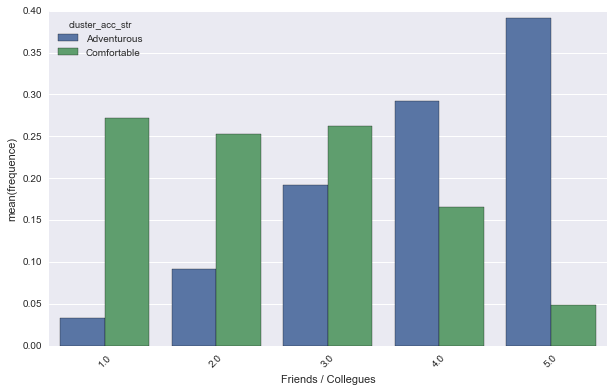

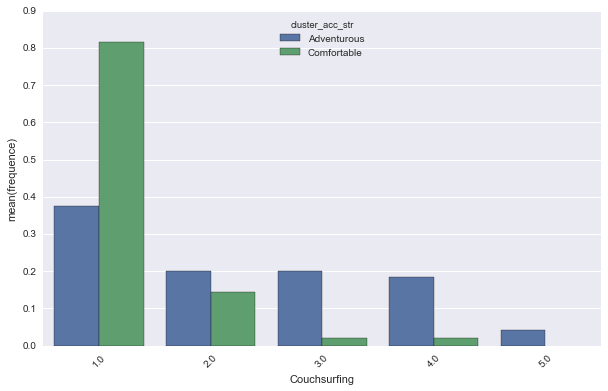

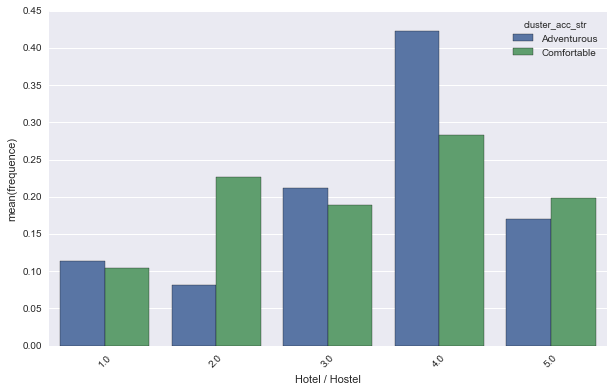

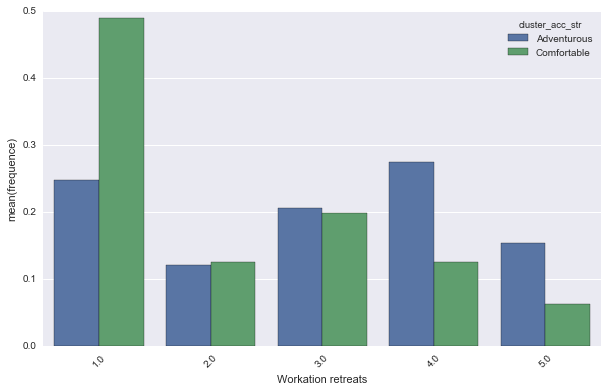

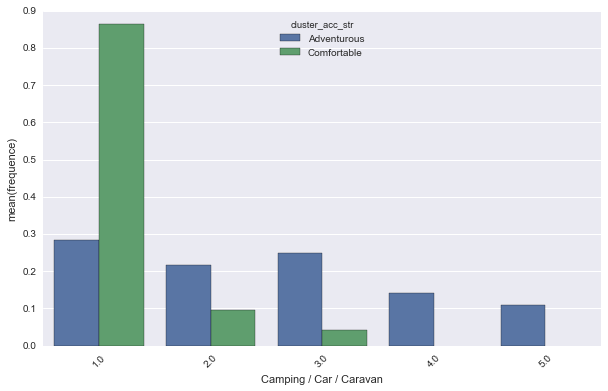

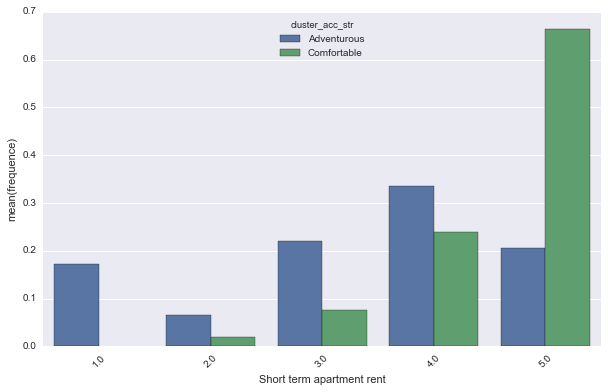

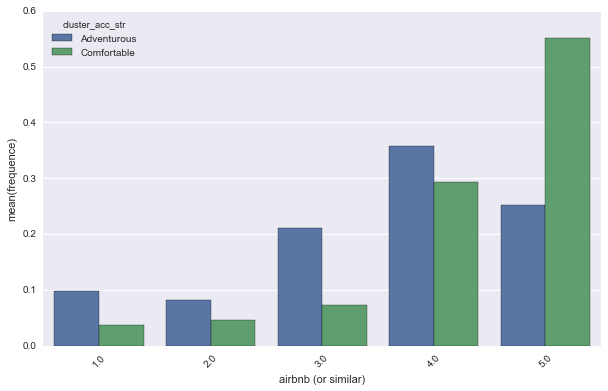

In [52]:
for col in accommodation:
    plot_bars(x=col, hue='cluster_acc_str', y='No y split.', df=df_, min_value=10)

### The following plots show how the clustering by mobility splits the respondents

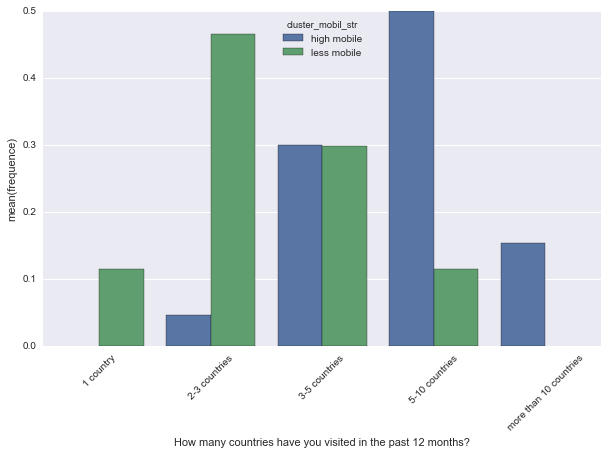

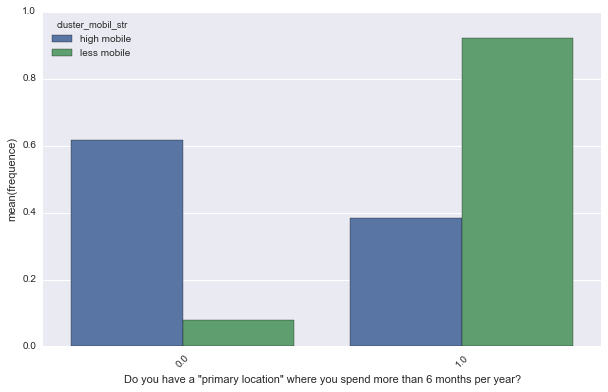

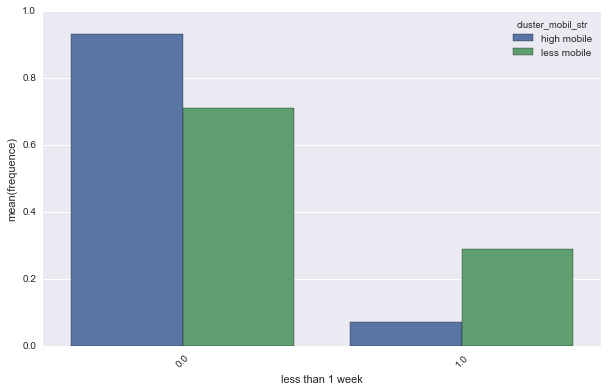

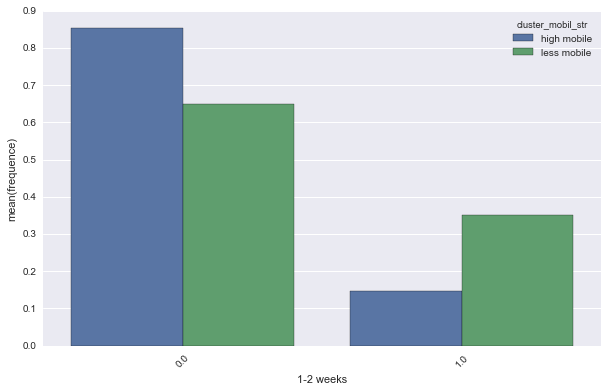

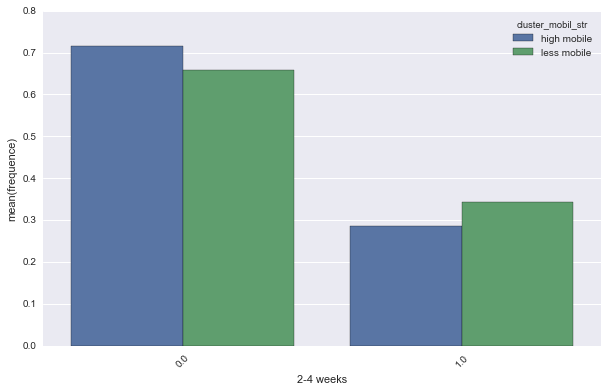

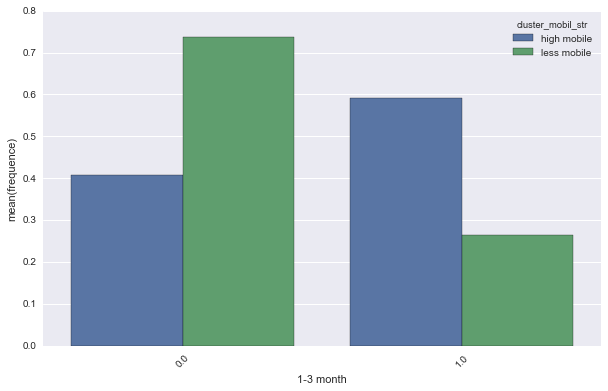

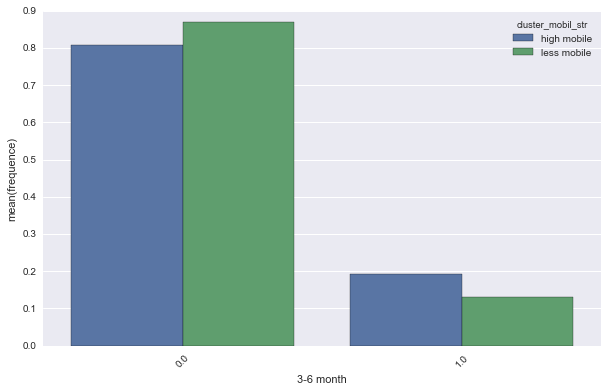

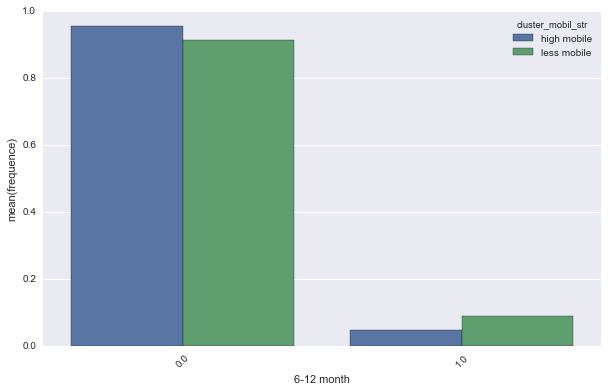

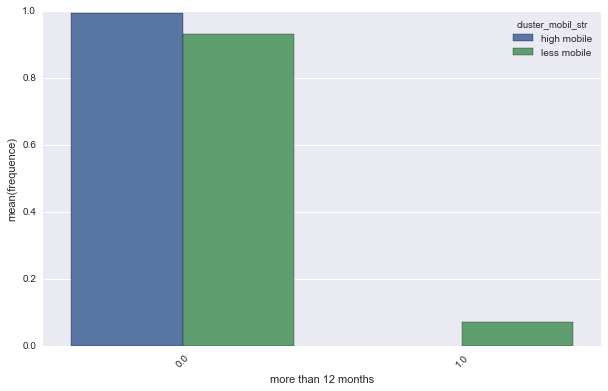

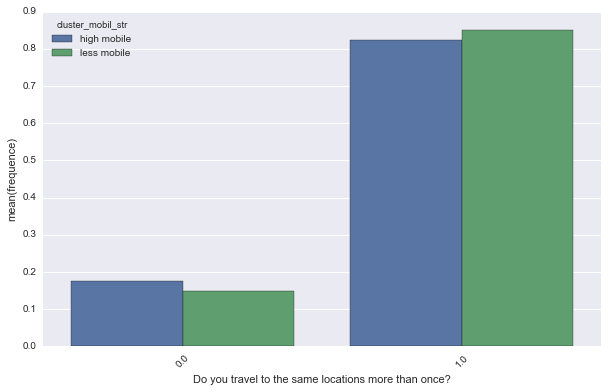

In [54]:
for col in mobility:
    plot_bars(x=col, hue='cluster_mobil_str', y='No y split.', df=df_, min_value=10)

### Now we can combine both clusterings:
Here we see that each combination of the too clusterings is sufficient populated.

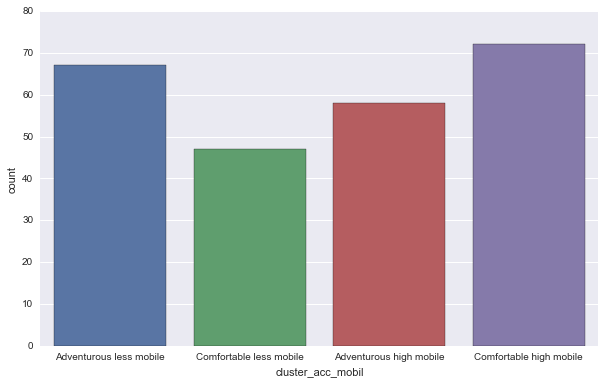

In [55]:
plt.figure(figsize=(10,6))
sns.countplot(x='cluster_acc_mobil', data=df_)

## How do the answers of the other questions relate to the clusters?
The answers of the the other questions are shown in different colors 
and for each possible answer we see how they distribute over the different cluster.
Note that here only answers are shown which have been given by at least 25 responents.

Read like: Relaxed and high mobile responents are disproportionately often traveling to africa.
Note: The pivoted verison of this (in the very end of this document), might be also interesting.

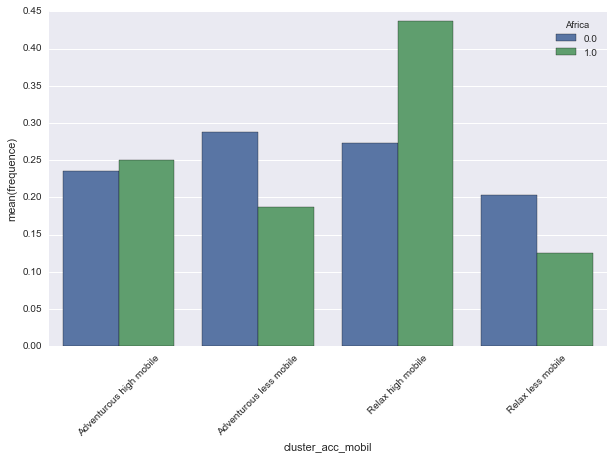

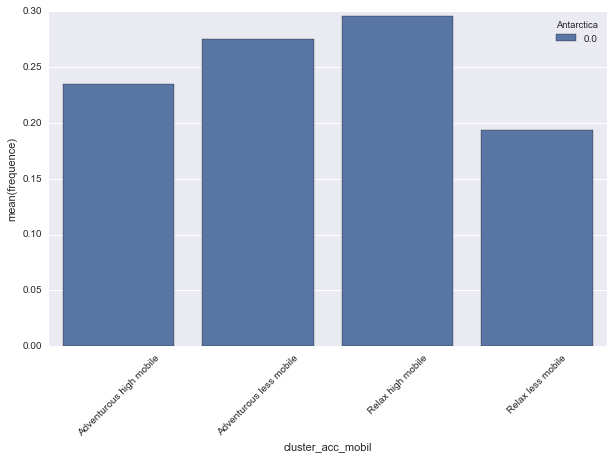

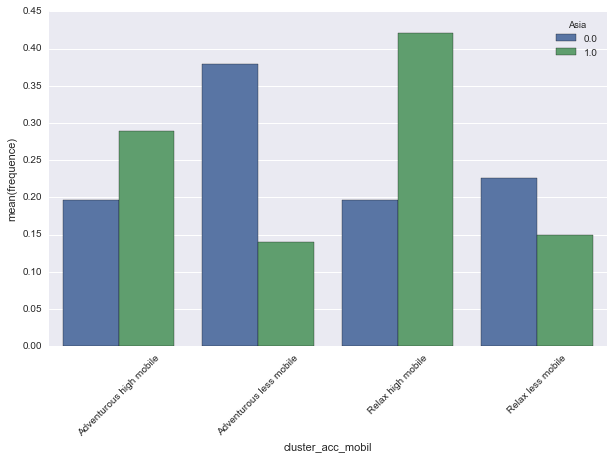

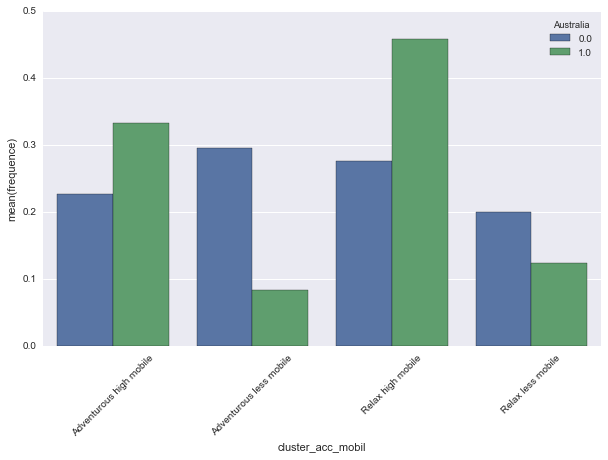

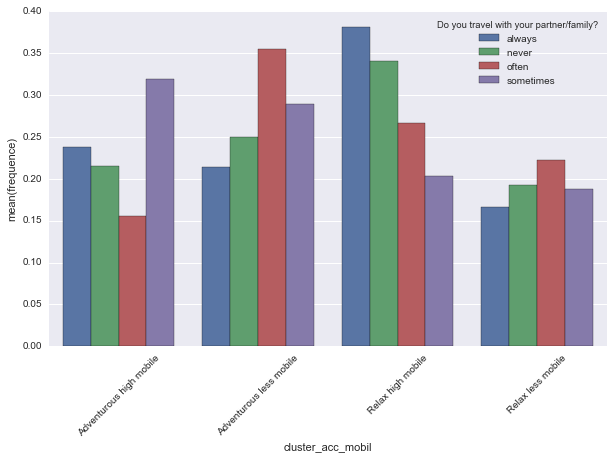

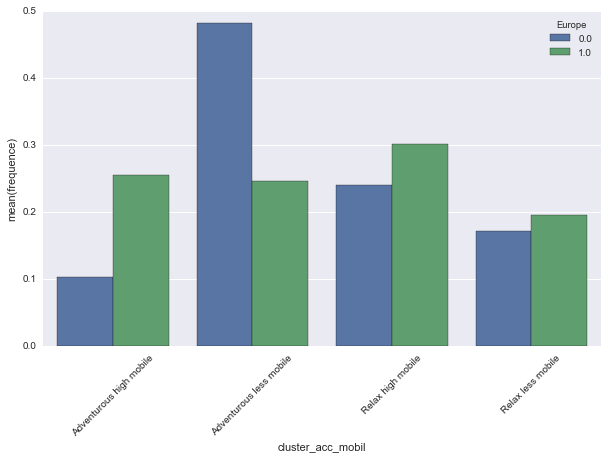

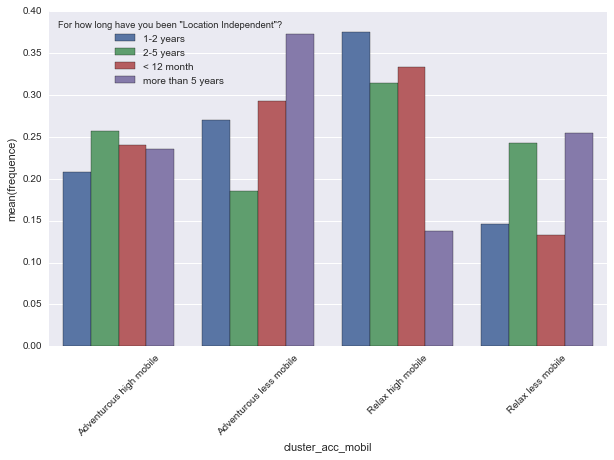

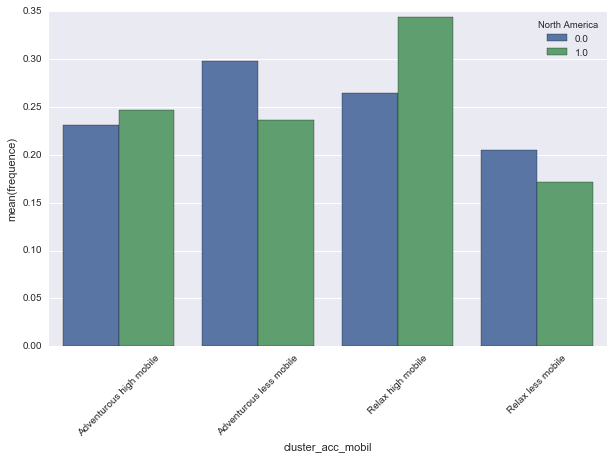

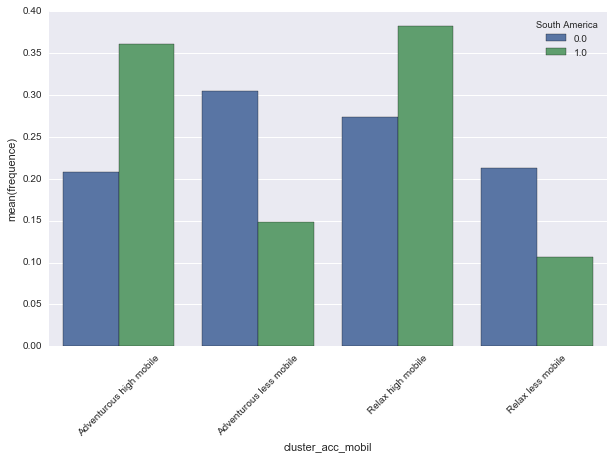

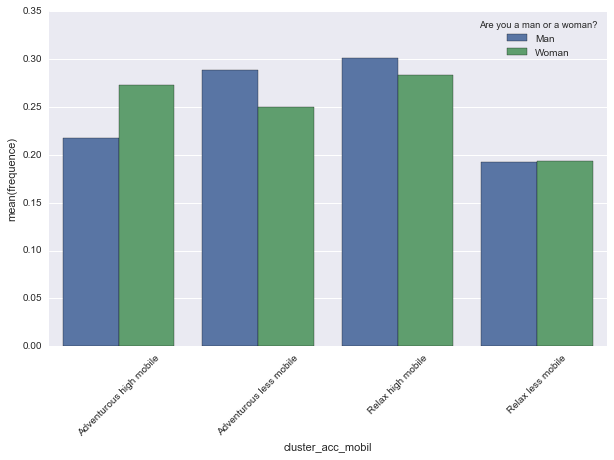

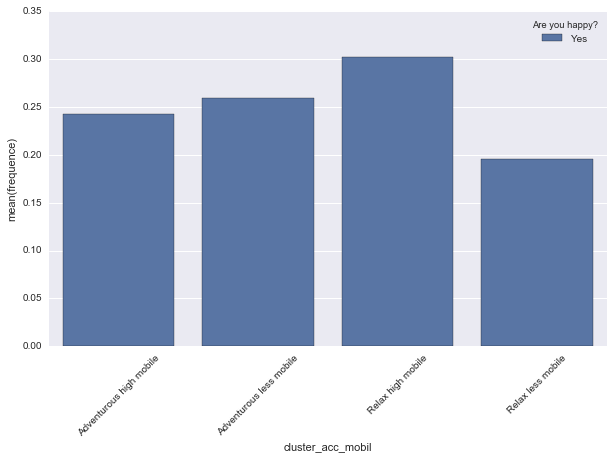

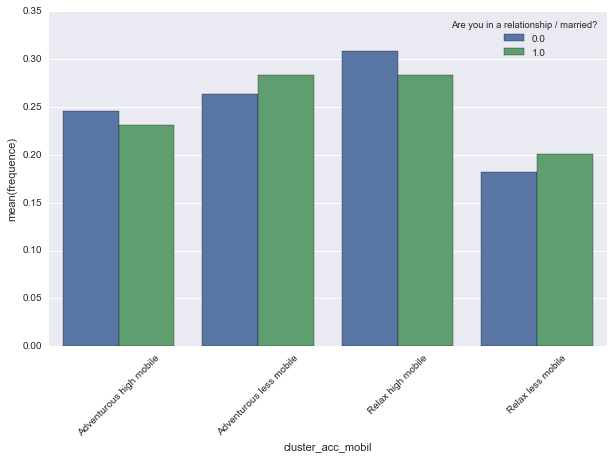

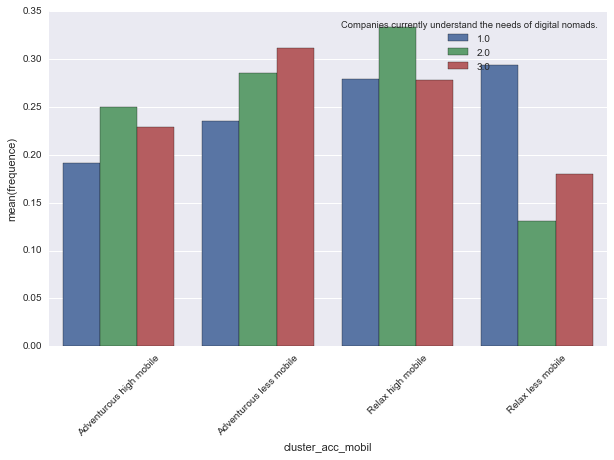

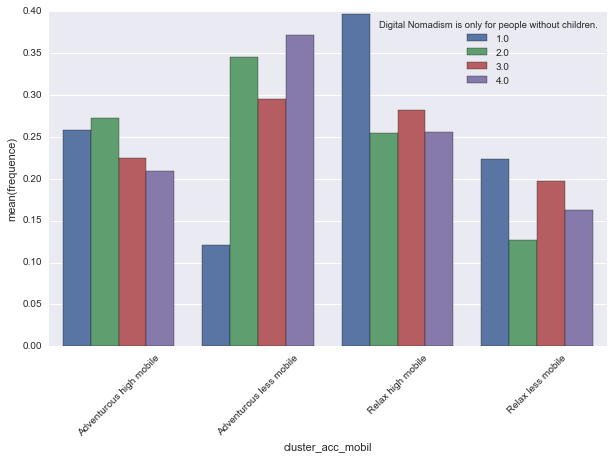

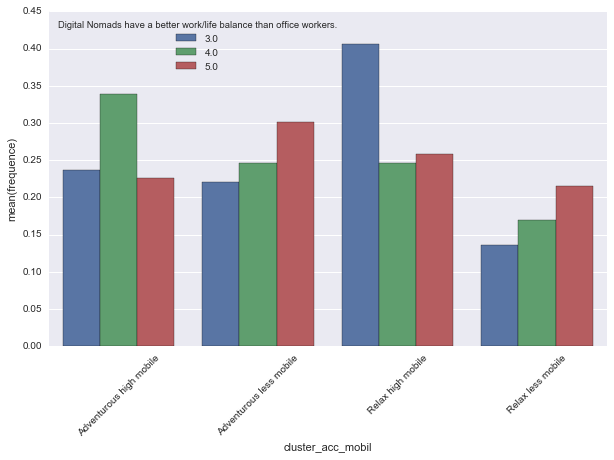

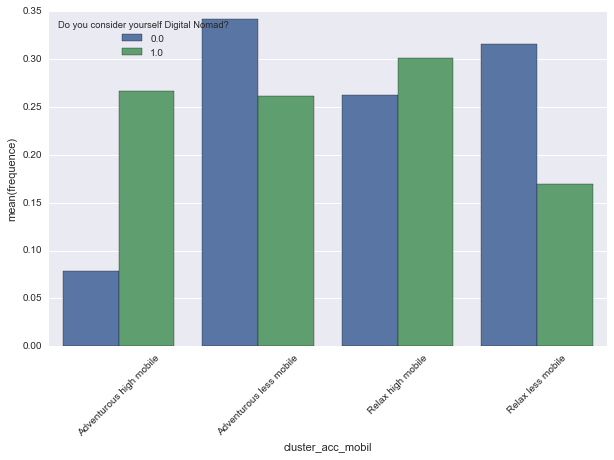

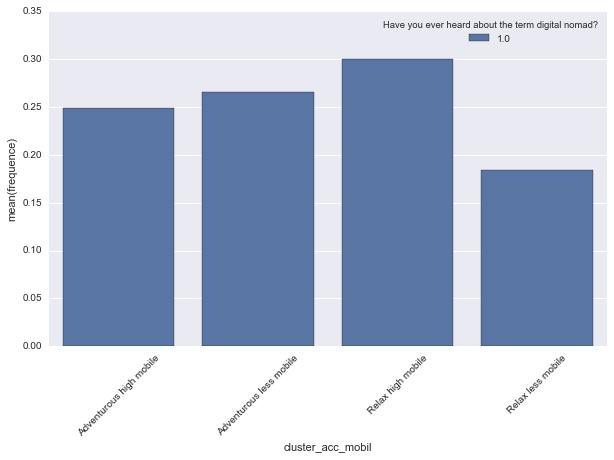

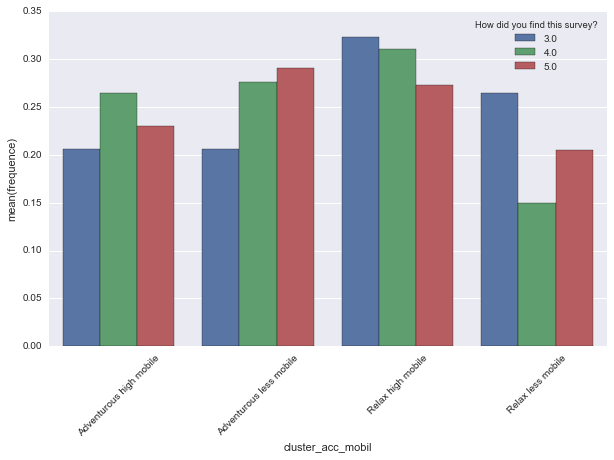

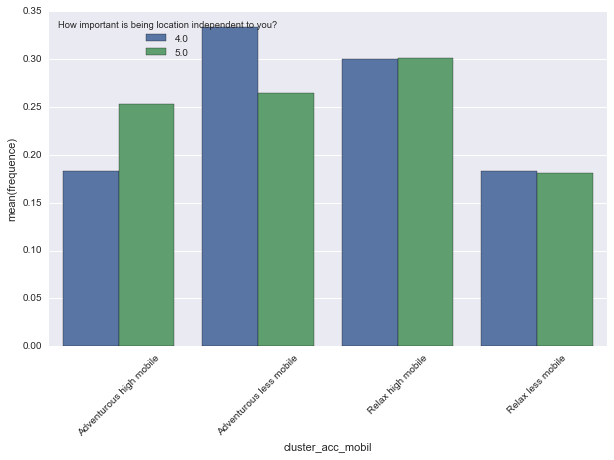

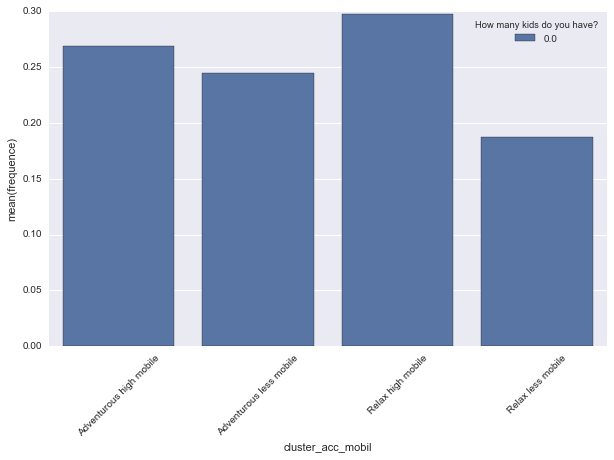

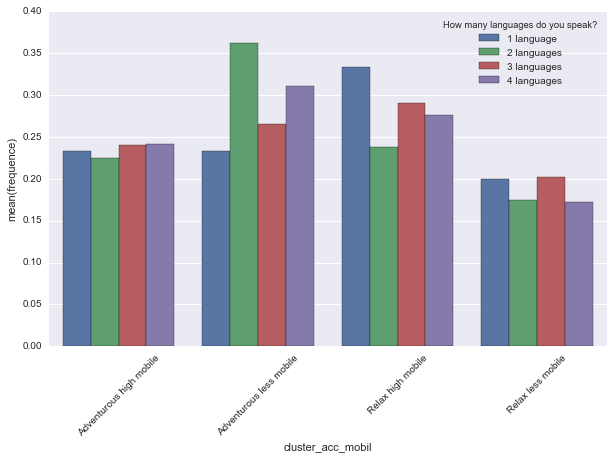

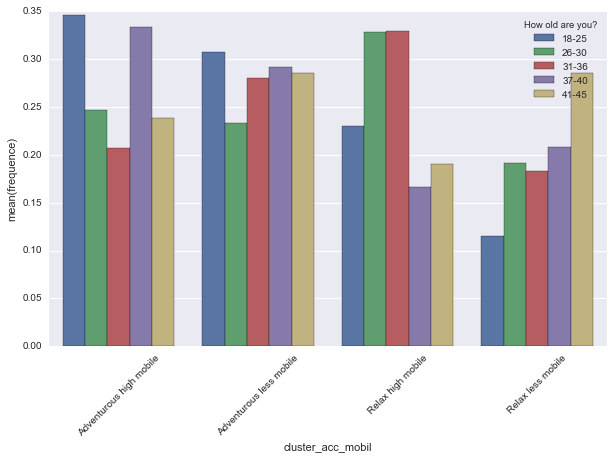

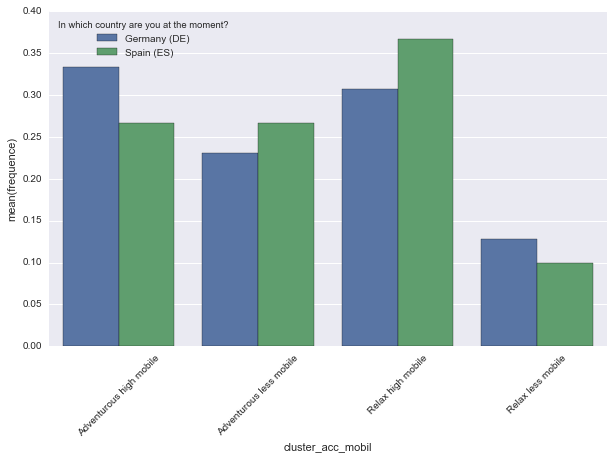

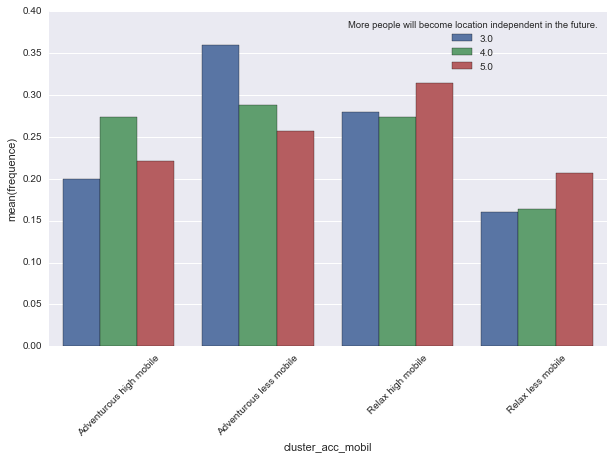

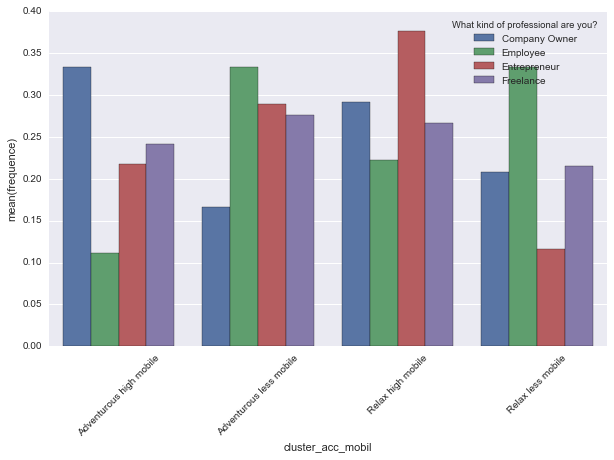

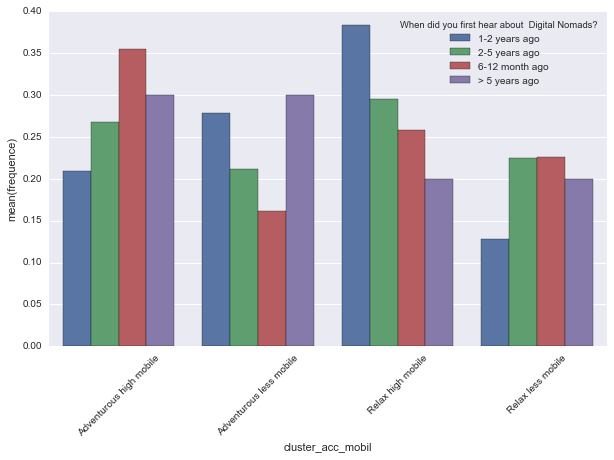

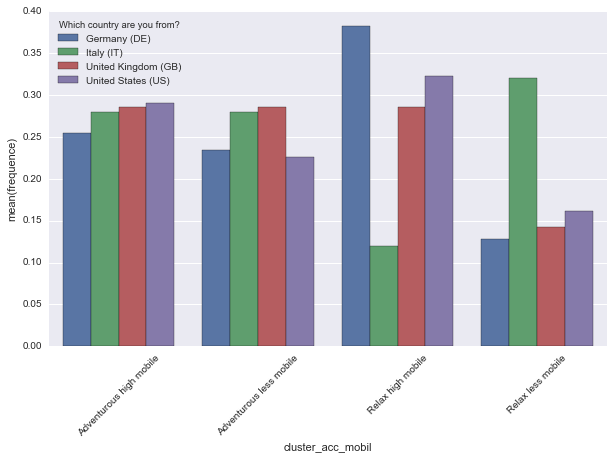

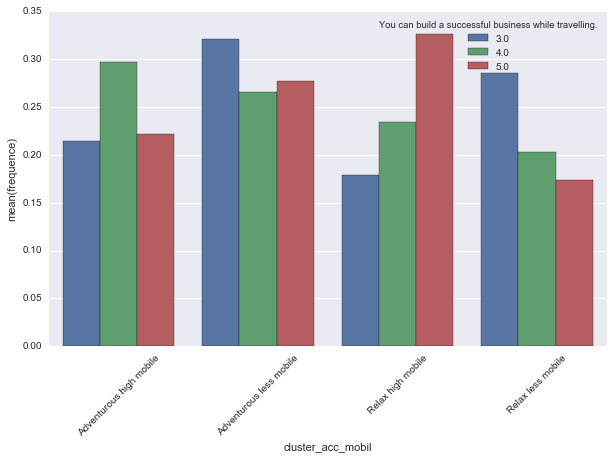

In [48]:
for col in liq.difference(accommodation | mobility):
    plot_bars(x='cluster_acc_mobil', hue=col, y='No y split.', df=df_.sort_values('cluster_acc_mobil'), min_value=25)
for col in aq:
    plot_bars(x='cluster_acc_mobil', hue=col, y='No y split.', df=df_.sort_values('cluster_acc_mobil'), min_value=25)

In [58]:
## We can also look at the question from the clustering using the cluster of the other clustering respectivly:

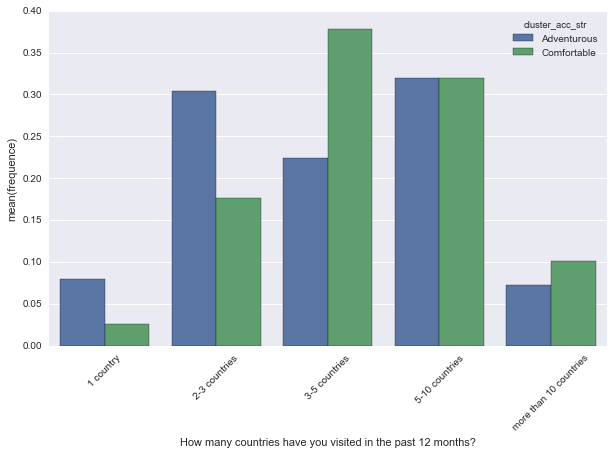

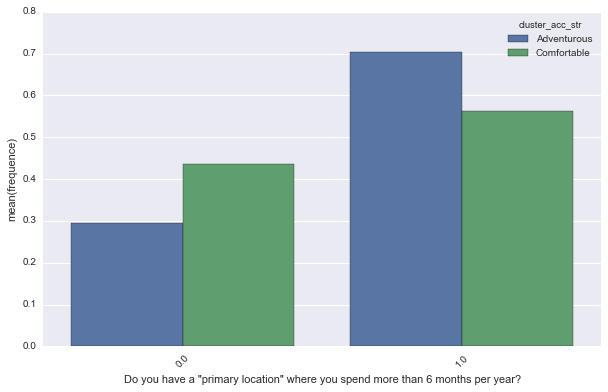

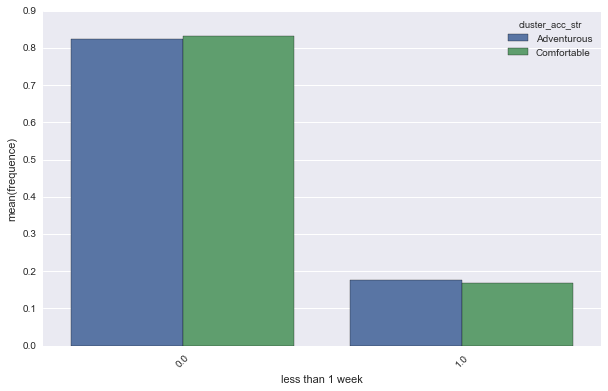

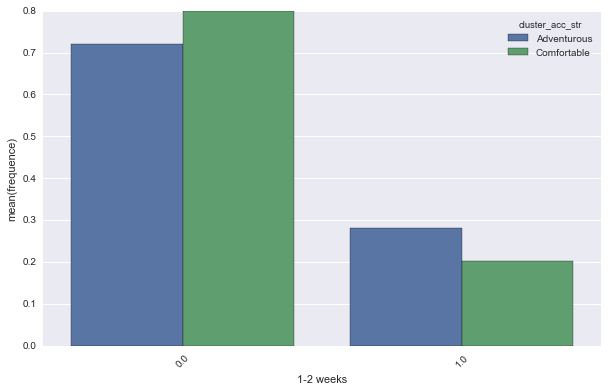

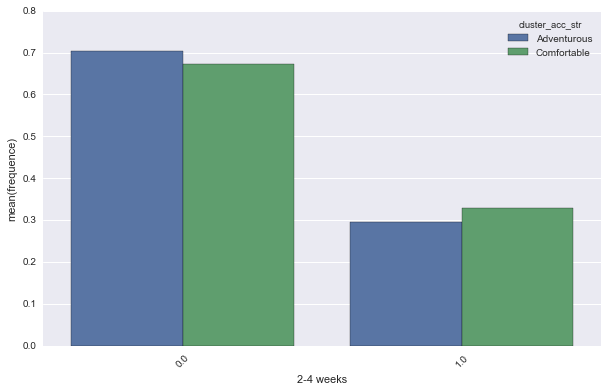

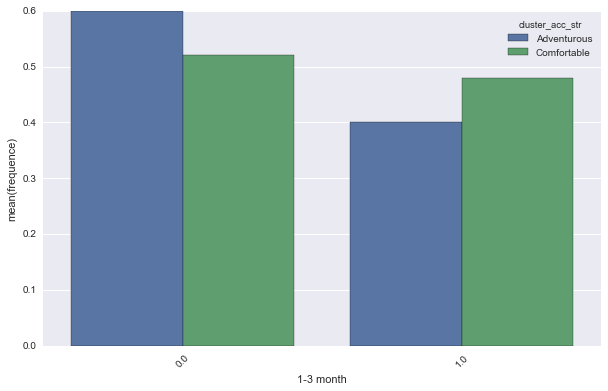

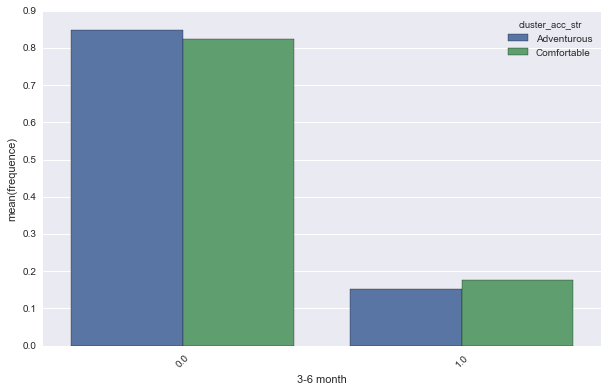

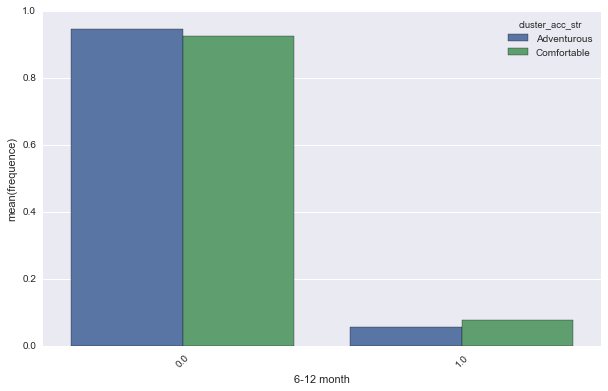

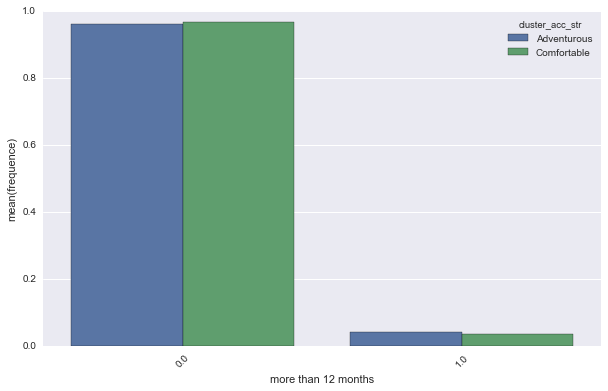

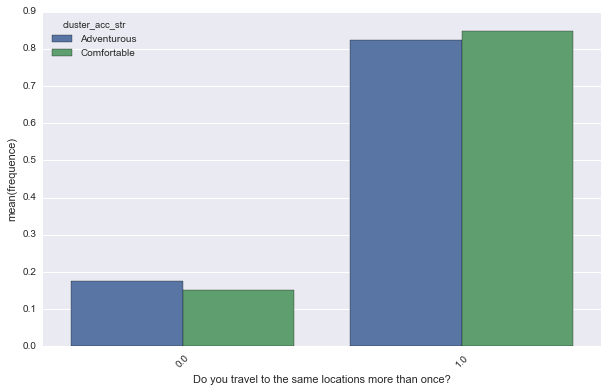

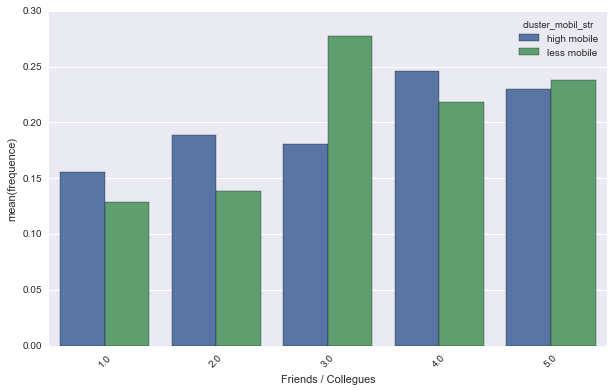

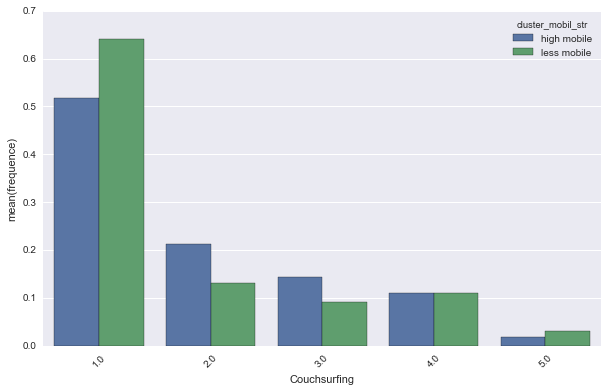

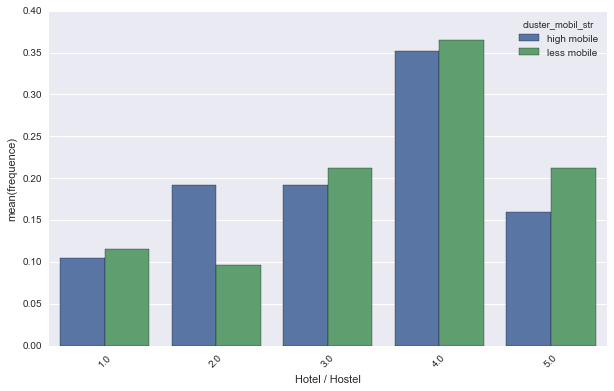

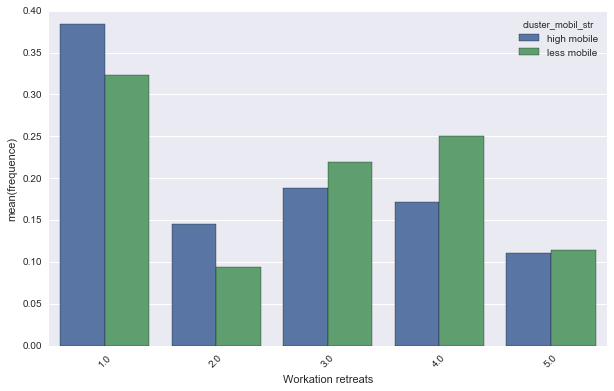

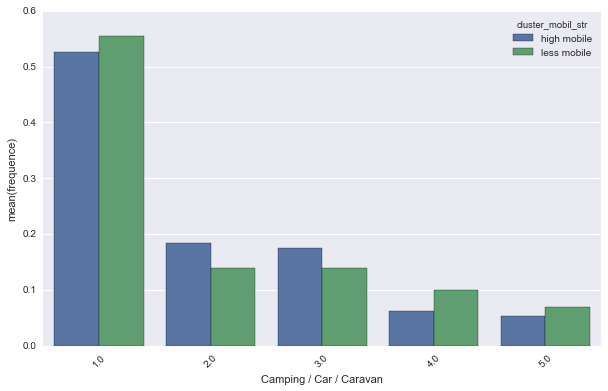

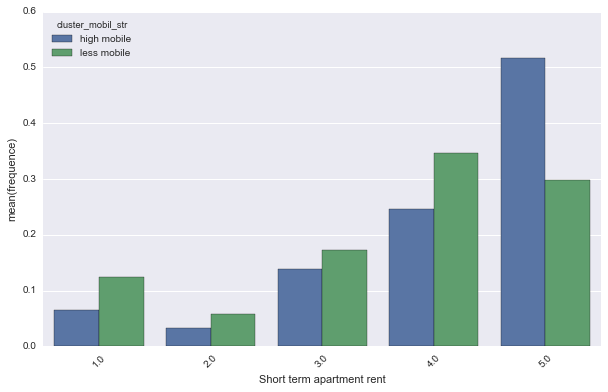

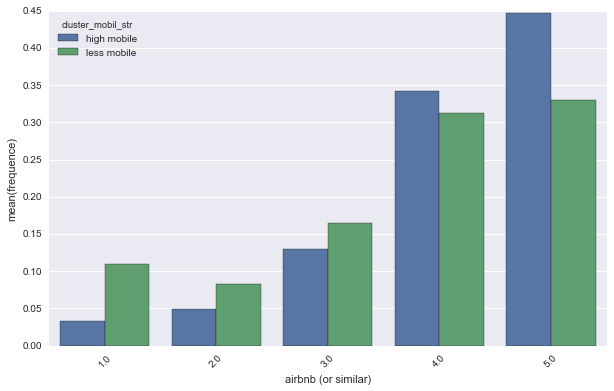

In [62]:
for col in mobility:
    plot_bars(x=col, hue='cluster_acc_str', y='No y split.', df=df_, min_value=25)
for col in accommodation:
    plot_bars(x=col, hue='cluster_mobil_str', y='No y split.', df=df_, min_value=25)

### We can pivot the earlier analysis to be more quantitative:

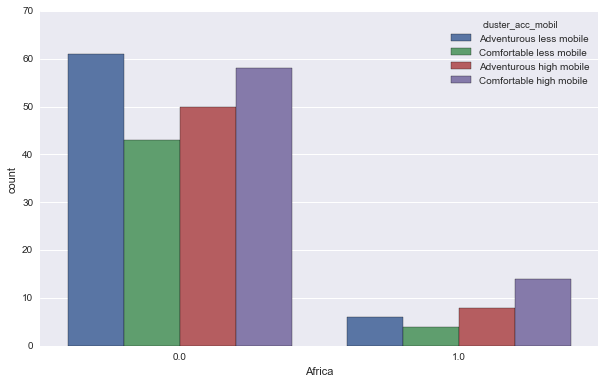

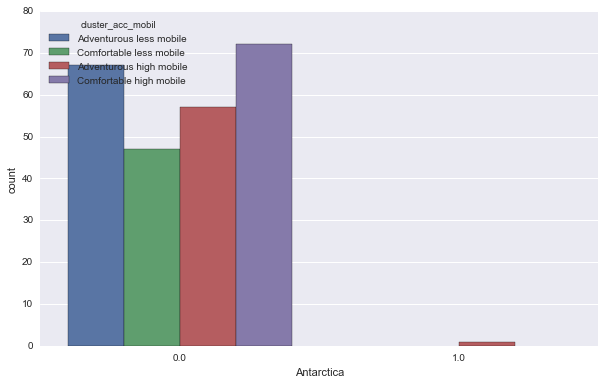

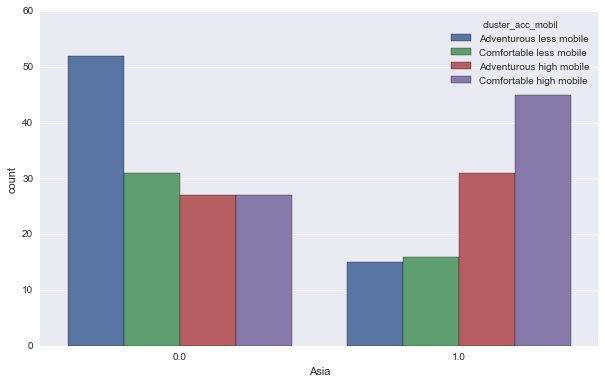

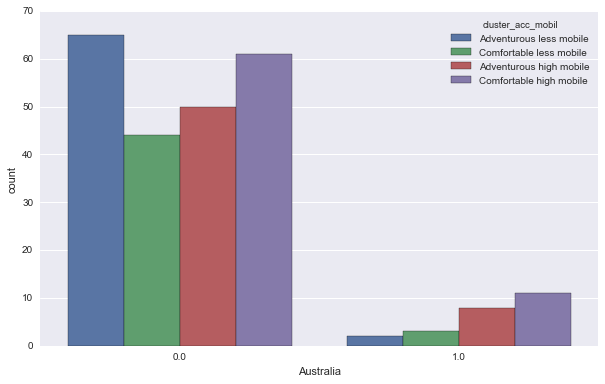

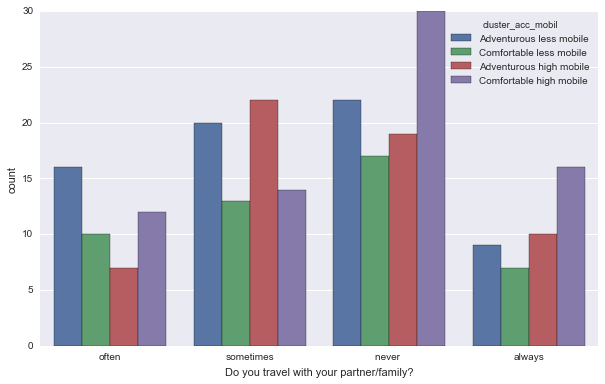

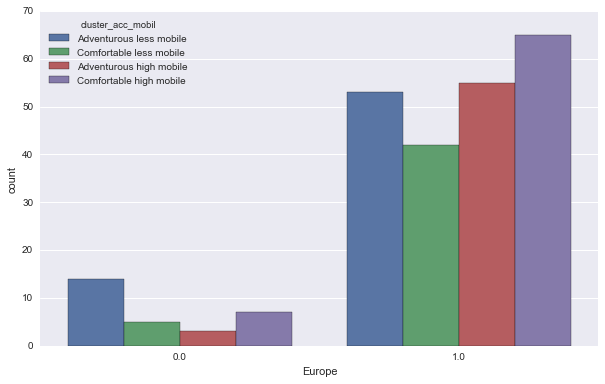

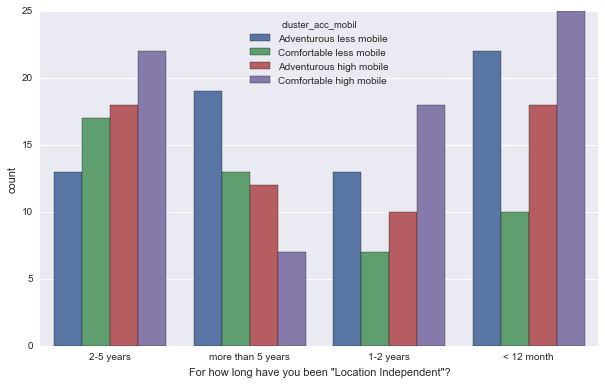

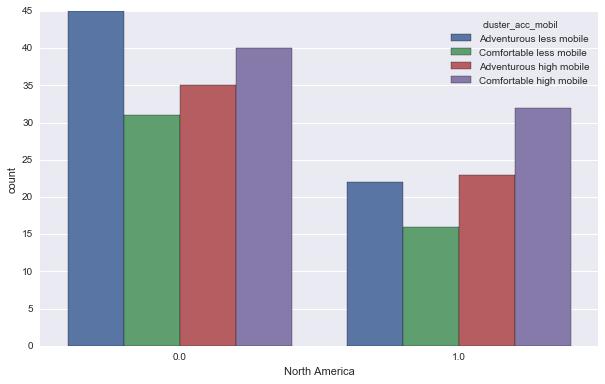

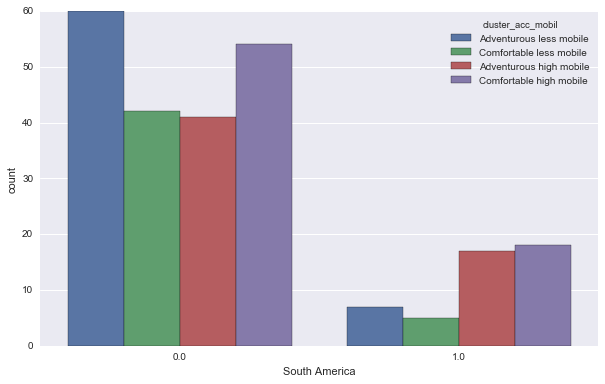

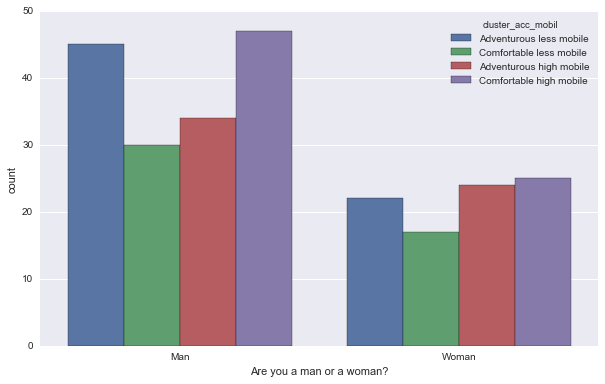

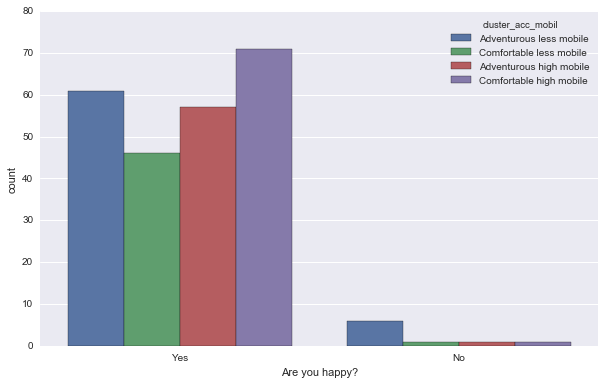

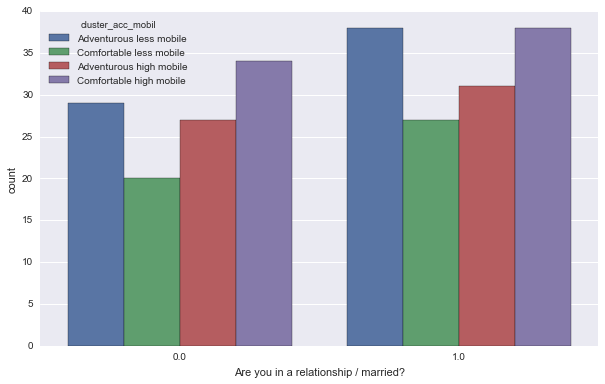

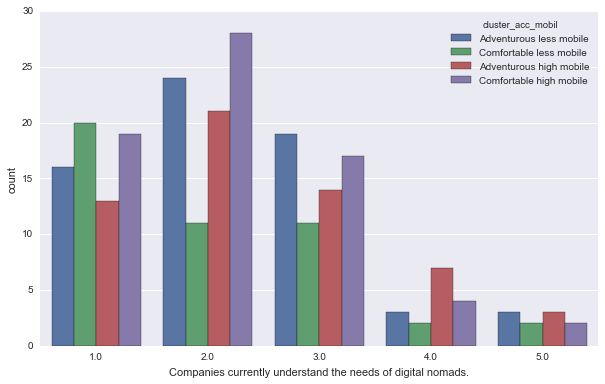

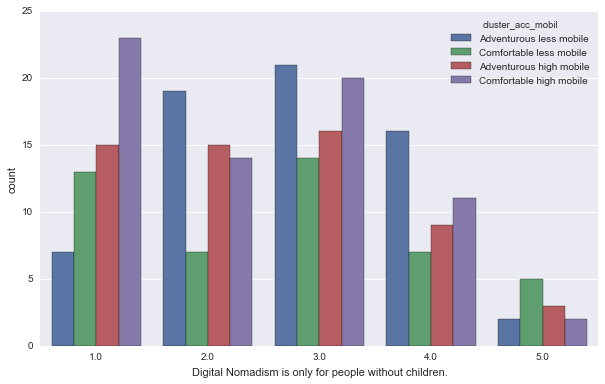

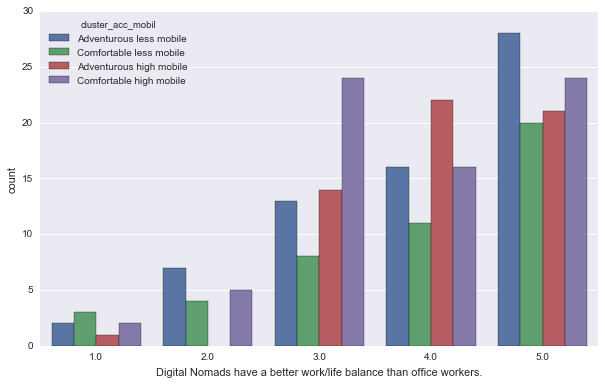

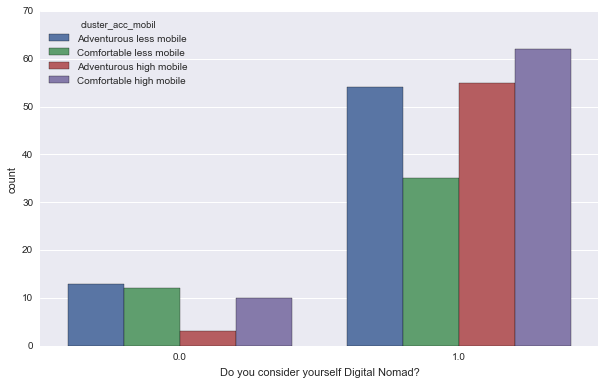

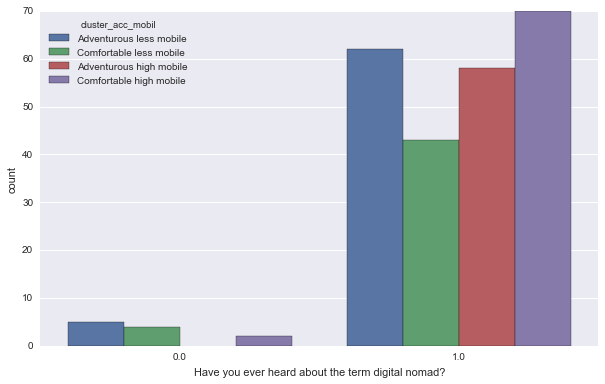

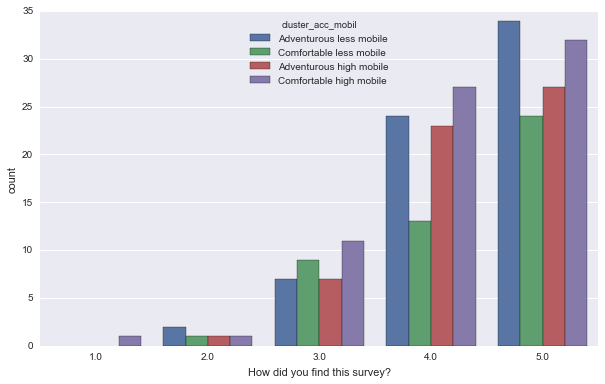

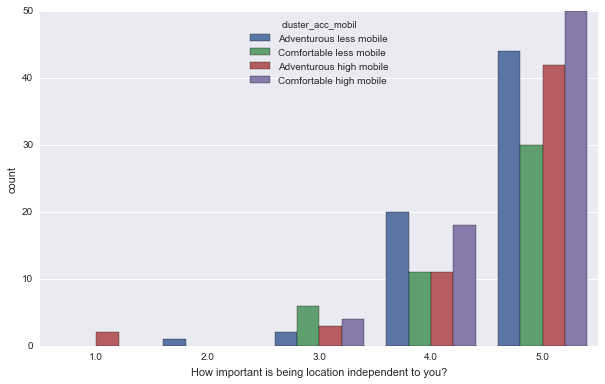

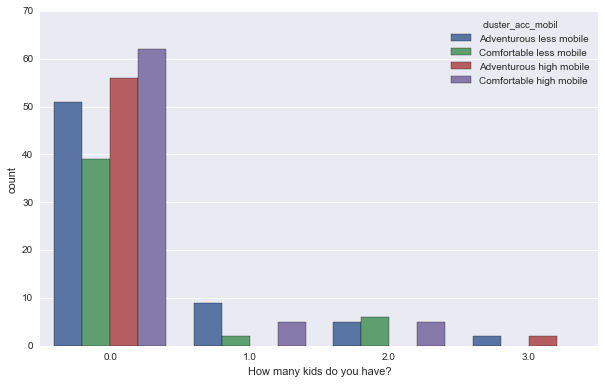

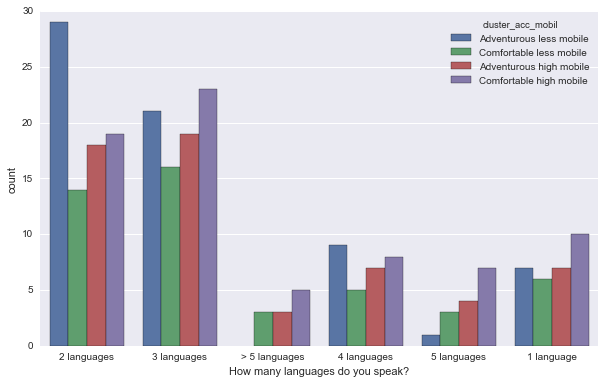

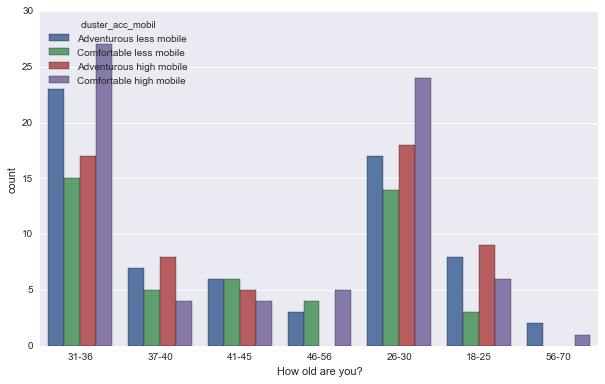

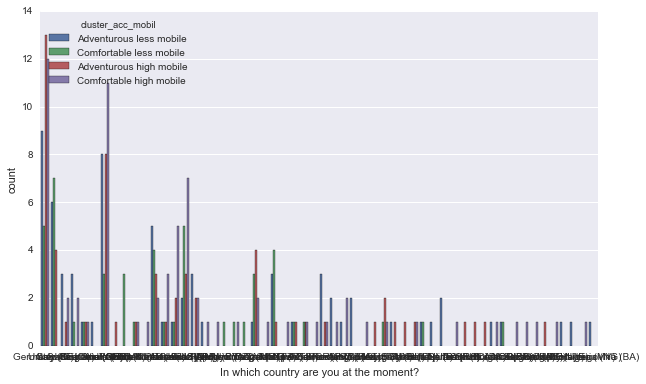

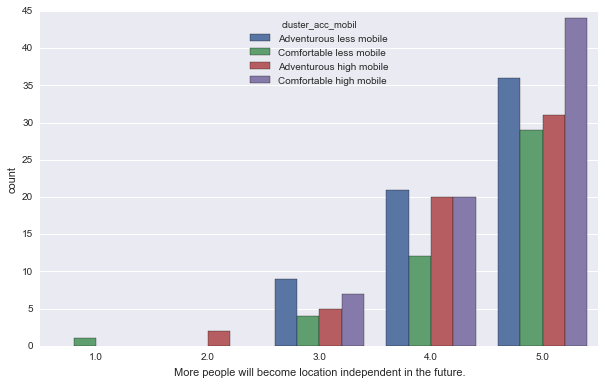

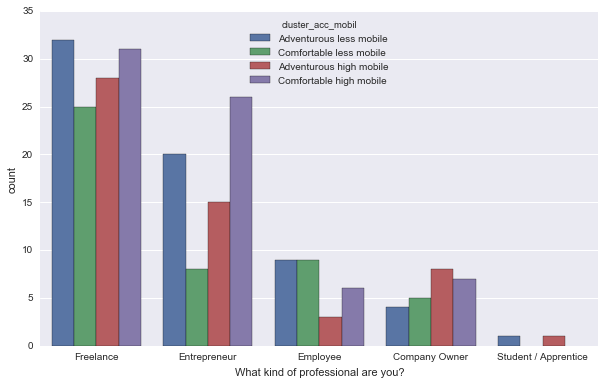

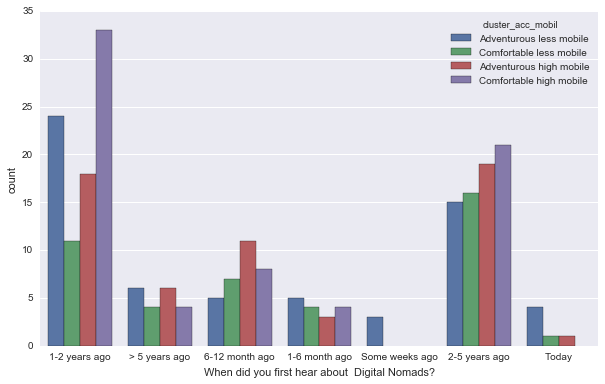

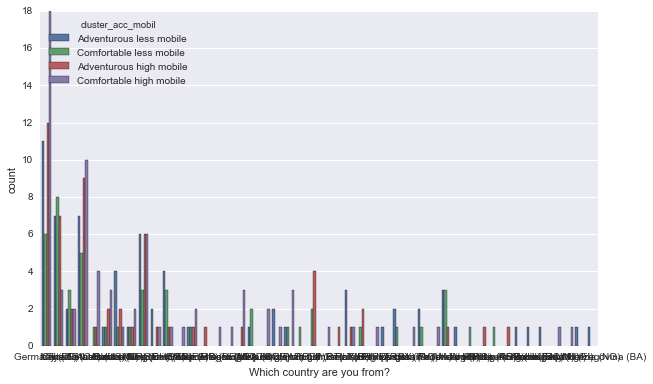

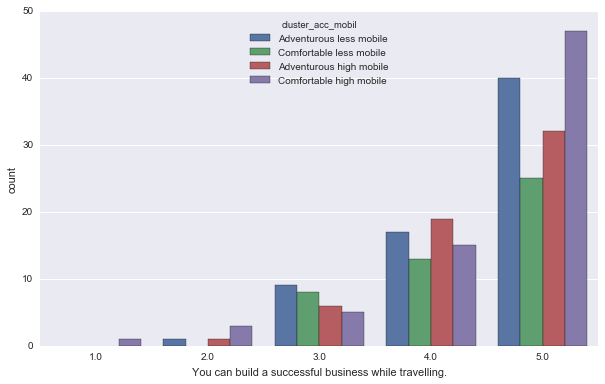

In [67]:
for col in liq.difference(accommodation | mobility):
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='cluster_acc_mobil', data=df_)
    plt.show()
    plt.clf()
for col in aq:
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='cluster_acc_mobil', data=df_)
    plt.show()
    plt.clf()
